Import of Libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

Understanding the data

Understanding the data

In [ ]:
df = pd.read_csv("credit_score.csv")

In [ ]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.shape

(100000, 28)

In [ ]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Data Cleaning

In [ ]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
df1['Annual_Income'].sample(30)

31983            10302.935
49485             49675.38
3446              30029.59
82530             15197.25
18976            104994.57
63924            17443.94_
5953              43504.07
12403             90668.85
51448            104929.28
46792           130832.37_
70175             79016.06
40238            176783.92
61765            17641.87_
95157            114148.24
48393             148570.8
7166             133377.21
26371              7139.64
44525             80247.24
47659              74800.0
71540            54259.42_
80509             17950.55
42292          12226464.0_
37355             42921.75
83646             7039.745
98279    59868.93000000001
63450            104428.08
94180            116574.04
5424              8406.375
19183              7233.01
48812             39797.06
Name: Annual_Income, dtype: object

In [ ]:
# Changing the datatype and replace the values
df1['Annual_Income'] = df1['Annual_Income'].str.replace('_','').astype(float)

In [ ]:
df1['Monthly_Inhand_Salary'] = df1['Monthly_Inhand_Salary'].replace(np.nan,0)

In [ ]:
df1['Monthly_Inhand_Salary'].isnull().sum()

0

In [ ]:
df1['Num_of_Loan'].unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [ ]:
df1['Num_of_Loan'] = df1['Num_of_Loan'].str.replace('_','').astype(int)
df1['Num_of_Loan'].dtype

dtype('int32')

In [ ]:
df1['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [ ]:
df1['Delay_from_due_date'] = df1['Delay_from_due_date'].replace('-','')

In [ ]:
df1['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [ ]:
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].str.replace('_','')

In [2]:
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].str.replace('-','')

NameError: name 'df1' is not defined

In [3]:
df1['Num_of_Delayed_Payment'].unique()

NameError: name 'df1' is not defined

In [4]:

df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].replace(np.nan,0)

NameError: name 'df1' is not defined

In [5]:
df1['Num_of_Delayed_Payment'].isnull().sum()

NameError: name 'df1' is not defined

In [6]:
df1['Num_of_Delayed_Payment'] = df1['Num_of_Delayed_Payment'].astype(int)

NameError: name 'df1' is not defined

In [7]:
df1['Num_of_Delayed_Payment'].info()

NameError: name 'df1' is not defined

In [8]:
df1['Credit_Mix'].unique()

NameError: name 'df1' is not defined

In [9]:
df1['Credit_Mix'] = df1['Credit_Mix'].str.replace('_','None')

NameError: name 'df1' is not defined

In [10]:
df1['Credit_Mix'].unique()

NameError: name 'df1' is not defined

LabelEncoding

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
df1['Credit_Mix'] = le.fit_transform(df1['Credit_Mix'])

In [ ]:
df1['Credit_Mix'].unique()

array([2, 1, 3, 0])

In [ ]:
df1['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [ ]:
df1['Outstanding_Debt'] = df1['Outstanding_Debt'].str.replace('_','')
df1['Outstanding_Debt'].isnull().sum()

0

In [ ]:
df1['Outstanding_Debt'] = df1['Outstanding_Debt'].astype(float)

In [ ]:
df1['Credit_History_Age'].describe

<bound method NDFrame.describe of 0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object>

In [ ]:
df1['Credit_History_Age'] = df1['Credit_History_Age'].str.findall(r'(\d+(?:\.\d+)?)')
df1['Credit_History_Age'] = df1['Credit_History_Age'].replace(np.nan,0)
df1['Credit_History_Age'].isnull().sum()

0

In [ ]:
df1['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [ ]:
df1['Monthly_Balance'].isnull().sum()

1200

In [ ]:
df1['Monthly_Balance'] = df1['Monthly_Balance'].str.replace('_','')
df1['Monthly_Balance'] = df1['Monthly_Balance'].replace(np.nan,0)
df1['Monthly_Balance'] = df1['Monthly_Balance'].astype(float)
df1['Monthly_Balance'].isnull().sum()

0

In [ ]:
df1['Credit_Score'].isnull().sum()

0

In [ ]:
df1['Credit_Score'] = le.fit_transform(df1['Credit_Score'])
df1['Credit_Score'].unique()

array([0, 2, 1])

SELECTION OF USEFUL DATA

In [ ]:
x = df1[['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Credit_Mix', 'Outstanding_Debt',
        'Monthly_Balance']]
y = df1[['Credit_Score']]

In [ ]:
x.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Monthly_Balance
0,19114.12,1824.843333,3,4,3,4,3,7,2,809.98,312.494089
1,19114.12,0.000000,3,4,3,4,-1,0,1,809.98,284.629162
2,19114.12,0.000000,3,4,3,4,3,7,1,809.98,331.209863
3,19114.12,0.000000,3,4,3,4,5,4,1,809.98,223.451310
4,19114.12,1824.843333,3,4,3,4,6,0,1,809.98,341.489231


In [ ]:
y.head(5)

,Credit_Score
0,0
1,0
2,0
3,0
4,0


Data Visualizations

<Axes: xlabel='Credit_Score', ylabel='count'>

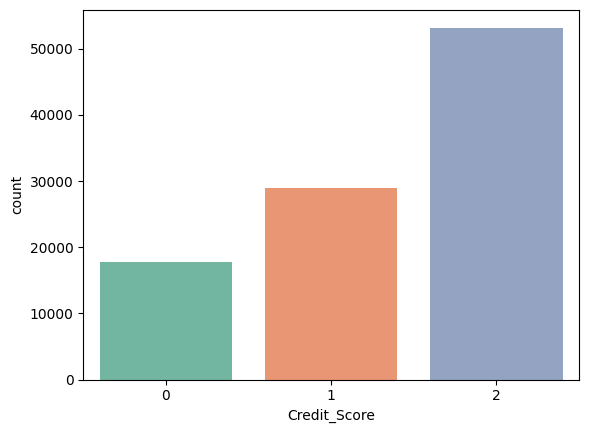

In [ ]:
sns.countplot(x="Credit_Score",data=df1,palette= 'Set2')

<Axes: xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

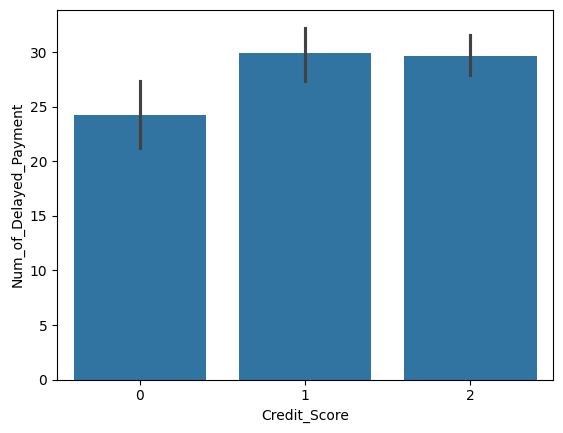

In [ ]:
sns.barplot(x="Credit_Score", y=df1["Num_of_Delayed_Payment"].astype(float), data=df1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

MODEL Training

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred_lr1 = lr.predict(x_test)
y_pred_lr1

array([1, 1, 2, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,r2_score,accuracy_score
accuracy_score(y_pred_lr1,y_test)*100

30.225

In [ ]:
cr = classification_report(y_pred_lr1,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.97      0.29      0.45     19418
           2       0.03      0.56      0.06       582

    accuracy                           0.30     20000
   macro avg       0.33      0.28      0.17     20000
weighted avg       0.95      0.30      0.44     20000



DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred_dt1 = dt.predict(x_test)
cr = classification_report(y_pred_dt1,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.59      0.59      3612
           1       0.69      0.69      0.69      5843
           2       0.72      0.73      0.73     10545

    accuracy                           0.69     20000
   macro avg       0.67      0.67      0.67     20000
weighted avg       0.69      0.69      0.69     20000



In [ ]:
accuracy_score(y_pred_dt1,y_test)*100

69.235

RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred_rfc1 = rfc.predict(x_test)

In [ ]:
cr = classification_report(y_pred_rfc1,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      3403
           1       0.78      0.78      0.78      5895
           2       0.80      0.79      0.79     10702

    accuracy                           0.77     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.77      0.77      0.77     20000



In [ ]:
accuracy_score(y_pred_rfc1,y_test)*100

77.295

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# حساب المقاييس الأساسية
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# لو فيه احتمالات (probabilities) نحسب ROC-AUC
try:
    y_proba = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
except:
    roc_auc = None

# طباعة النتائج
print("🔹 Model Evaluation Metrics 🔹")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
if roc_auc is not None:
    print(f"ROC-AUC:   {roc_auc:.4f}")
else:
    print("ROC-AUC:   (Not applicable for this model)")

# تقرير تفصيلي
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# مصفوفة الالتباس
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
